In [1]:
import sympy as sm

In [2]:
sm.init_printing()

# Symbols and Functions

In [3]:
a, b, th, gamma, x, t, y, z = sm.symbols('a, b, theta, gamma, x, t, y, z')

In [4]:
%whos

Variable   Type      Data/Info
------------------------------
a          Symbol    a
b          Symbol    b
gamma      Symbol    gamma
sm         module    <module 'sympy' from '/us<...>kages/sympy/__init__.py'>
t          Symbol    t
th         Symbol    theta
x          Symbol    x
y          Symbol    y
z          Symbol    z


In [5]:
a, b, th, gamma, x, t, y, z

In [6]:
f = sm.Function('f')

In [7]:
f(t)

In [8]:
f(x, y, z)

In [9]:
a1, a2, a3 = sm.symbols('a1, a2, a3')

In [10]:
a1, a2, a3

# Expressions

In [11]:
expr1 = a + b - x
expr1

In [12]:
expr2 = f(t) + 2*f(x, y, z) + a/b
expr2

In [13]:
expr3 = sm.sin(f(t)) - sm.tan(a/b)/sm.log(gamma)
expr3

# Printing

In [14]:
print(expr3)

sin(f(t)) - tan(a/b)/log(gamma)


In [17]:
repr(expr3)

'sin(f(t)) - tan(a/b)/log(gamma)'

In [18]:
sm.srepr(expr1)

"Add(Symbol('a'), Symbol('b'), Mul(Integer(-1), Symbol('x')))"

In [19]:
sm.pprint(expr3)

               ⎛a⎞
            tan⎜─⎟
               ⎝b⎠
sin(f(t)) - ──────
            log(γ)


In [20]:
print(sm.latex(expr3))

\sin{\left(f{\left(t \right)} \right)} - \frac{\tan{\left(\frac{a}{b} \right)}}{\log{\left(\gamma \right)}}


In [21]:
sm.ccode(expr1)

'a + b - x'

In [22]:
print(sm.octave_code(expr3))

% Not supported in Octave:
% f
sin(f(t)) - tan(a./b)./log(gamma)


# Derivatives

In [23]:
expr3

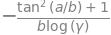

In [27]:
sm.diff(expr3, a)

In [28]:
part1 = sm.diff(expr3, a)

In [29]:
part2 = sm.diff(part1, b)

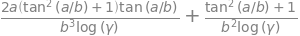

In [30]:
part2

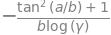

In [31]:
expr3.diff(a)

In [32]:
expr3.diff(t)

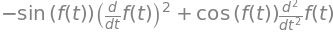

In [33]:
expr3.diff(t, 2)

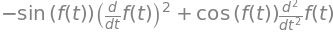

In [34]:
expr3.diff(t).diff(t)

# Numerical Evaluation

In [35]:
expr1

In [38]:
repl = {a: 5, b: -38, x: 102}
repl

In [39]:
expr1.subs(repl)

In [40]:
expr1.xreplace(repl)

In [41]:
type(expr1.subs(repl))

sympy.core.numbers.Integer

In [45]:
type(-135)

int

In [46]:
type(int(expr1.subs(repl)))

int

In [48]:
expr4 = sm.pi/4 + sm.sin(x*y)
expr4

In [49]:
expr4.xreplace({x: 12, y: 24})

In [50]:
expr4.evalf()

In [51]:
expr4.evalf(subs={x: 12, y:24})

In [53]:
type(expr4.evalf(subs={x: 12, y:24}))

sympy.core.numbers.Float

In [55]:
type(float(expr4.evalf(subs={x: 12, y:24})))

float

In [63]:
expr4.evalf(subs={x: 12, y:24}, n=1000)

In [64]:
expr1

In [67]:
eval_expr1 = sm.lambdify((a, b, x), expr1)

In [68]:
eval_expr1(12.0, 34.3, -2.0)

In [61]:
type(eval_expr1(12.0, 34.3, -2.0))

float

# Matrices & Linear Algebra

In [69]:
mat1 = sm.Matrix([[1, 2], [3, 4]])
mat1

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [70]:
mat1.shape

In [71]:
mat1.det()

In [72]:
mat2 = sm.Matrix([[expr1, expr2], [expr3, expr4]])
mat2

⎡                    a                      ⎤
⎢    a + b - x       ─ + f(t) + 2⋅f(x, y, z)⎥
⎢                    b                      ⎥
⎢                                           ⎥
⎢               ⎛a⎞                         ⎥
⎢            tan⎜─⎟                         ⎥
⎢               ⎝b⎠                  π      ⎥
⎢sin(f(t)) - ──────       sin(x⋅y) + ─      ⎥
⎣            log(γ)                  4      ⎦

In [73]:
mat2.diff(t)

⎡                    d       ⎤
⎢        0           ──(f(t))⎥
⎢                    dt      ⎥
⎢                            ⎥
⎢          d                 ⎥
⎢cos(f(t))⋅──(f(t))     0    ⎥
⎣          dt                ⎦

In [74]:
mat1 + mat2

⎡                        a                          ⎤
⎢    a + b - x + 1       ─ + f(t) + 2⋅f(x, y, z) + 2⎥
⎢                        b                          ⎥
⎢                                                   ⎥
⎢                   ⎛a⎞                             ⎥
⎢                tan⎜─⎟                             ⎥
⎢                   ⎝b⎠                  π          ⎥
⎢sin(f(t)) + 3 - ──────       sin(x⋅y) + ─ + 4      ⎥
⎣                log(γ)                  4          ⎦

In [75]:
mat1 * mat2

⎡                                  ⎛a⎞                                        
⎢                             2⋅tan⎜─⎟                                        
⎢                                  ⎝b⎠       a                                
⎢   a + b - x + 2⋅sin(f(t)) - ────────       ─ + f(t) + 2⋅f(x, y, z) + 2⋅sin(x
⎢                              log(γ)        b                                
⎢                                                                             
⎢                                     ⎛a⎞                                     
⎢                                4⋅tan⎜─⎟                                     
⎢                                     ⎝b⎠  3⋅a                                
⎢3⋅a + 3⋅b - 3⋅x + 4⋅sin(f(t)) - ────────  ─── + 3⋅f(t) + 6⋅f(x, y, z) + 4⋅sin
⎣                                 log(γ)    b                                 

         ⎤
         ⎥
      π  ⎥
⋅y) + ─  ⎥
      2  ⎥
         ⎥
         ⎥
         ⎥
         ⎥
(x⋅y) + π⎥
         ⎦

In [76]:
sm.hadamard_product(mat1, mat2)

⎡                        2⋅a                        ⎤
⎢      a + b - x         ─── + 2⋅f(t) + 4⋅f(x, y, z)⎥
⎢                         b                         ⎥
⎢                                                   ⎥
⎢                   ⎛a⎞                             ⎥
⎢              3⋅tan⎜─⎟                             ⎥
⎢                   ⎝b⎠                             ⎥
⎢3⋅sin(f(t)) - ────────        4⋅sin(x⋅y) + π       ⎥
⎣               log(γ)                              ⎦

In [77]:
mat1**2

⎡7   10⎤
⎢      ⎥
⎣15  22⎦

In [78]:
mat1 * mat1

⎡7   10⎤
⎢      ⎥
⎣15  22⎦

In [79]:
sm.eye(5)

⎡1  0  0  0  0⎤
⎢             ⎥
⎢0  1  0  0  0⎥
⎢             ⎥
⎢0  0  1  0  0⎥
⎢             ⎥
⎢0  0  0  1  0⎥
⎢             ⎥
⎣0  0  0  0  1⎦

In [80]:
sm.zeros(2,4)

⎡0  0  0  0⎤
⎢          ⎥
⎣0  0  0  0⎦

# Linear systems

In [85]:
lin_expr_1 = a*x + b**2*y + sm.sin(gamma)*z
lin_expr_1

In [86]:
lin_expr_2 = sm.sin(f(t))*x + sm.log(f(t))*z
lin_expr_2

In [87]:
sm.Eq(lin_expr_1, 0)

In [88]:
sm.Eq(lin_expr_2, 0)

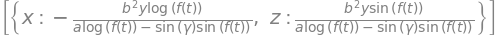

In [89]:
res = sm.solve([lin_expr_1, lin_expr_2], x, z, dict=True)
res

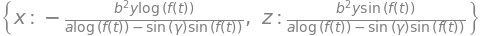

In [90]:
res_dict = res[0]
res_dict

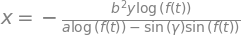

In [91]:
sm.Eq(x, res_dict[x])

In [92]:
lin_mat_exprs = sm.Matrix([lin_expr_1, lin_expr_2])
lin_mat_exprs

⎡         2               ⎤
⎢  a⋅x + b ⋅y + z⋅sin(γ)  ⎥
⎢                         ⎥
⎣x⋅sin(f(t)) + z⋅log(f(t))⎦

In [93]:
A = lin_mat_exprs.jacobian([x, z])
A

⎡    a       sin(γ)  ⎤
⎢                    ⎥
⎣sin(f(t))  log(f(t))⎦

In [94]:
b = -lin_mat_exprs.xreplace({x: 0, z: 0})
b

⎡  2  ⎤
⎢-b ⋅y⎥
⎢     ⎥
⎣  0  ⎦

In [95]:
A.LUsolve(b)

⎡               2                         ⎤
⎢   2          b ⋅y⋅sin(γ)⋅sin(f(t))      ⎥
⎢- b ⋅y - ────────────────────────────────⎥
⎢           ⎛            sin(γ)⋅sin(f(t))⎞⎥
⎢         a⋅⎜log(f(t)) - ────────────────⎟⎥
⎢           ⎝                   a        ⎠⎥
⎢─────────────────────────────────────────⎥
⎢                    a                    ⎥
⎢                                         ⎥
⎢              2                          ⎥
⎢             b ⋅y⋅sin(f(t))              ⎥
⎢    ────────────────────────────────     ⎥
⎢      ⎛            sin(γ)⋅sin(f(t))⎞     ⎥
⎢    a⋅⎜log(f(t)) - ────────────────⎟     ⎥
⎣      ⎝                   a        ⎠     ⎦

# Simplification

In [97]:
sm.simplify(A.LUsolve(b))

⎡         2                    ⎤
⎢       -b ⋅y⋅log(f(t))        ⎥
⎢──────────────────────────────⎥
⎢a⋅log(f(t)) - sin(γ)⋅sin(f(t))⎥
⎢                              ⎥
⎢         2                    ⎥
⎢        b ⋅y⋅sin(f(t))        ⎥
⎢──────────────────────────────⎥
⎣a⋅log(f(t)) - sin(γ)⋅sin(f(t))⎦

In [98]:
sm.cos(gamma)**2 + sm.sin(gamma)**2

In [99]:
sm.trigsimp(sm.cos(gamma)**2 + sm.sin(gamma)**2)

In [100]:
sub_exprs, simp_expr = sm.cse(A.LUsolve(b).diff(t))

In [101]:
simp_expr

⎡⎡x₀⋅(-x₁₀⋅x₁₁⋅x₄⋅x₇ - x₁₁⋅x₁₂⋅x₅)⎤⎤
⎢⎢                                ⎥⎥
⎣⎣    x₁₀⋅x₁₃⋅x₇ + x₁₂⋅x₁₃⋅x₂     ⎦⎦

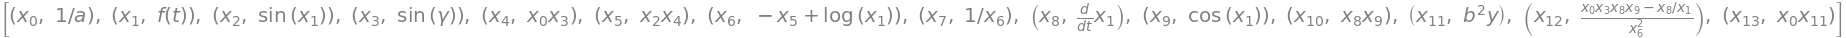

In [102]:
sub_exprs